# TASK 1: Principle Component Analysis

**Importing required libraries**

We will install the nexessary libraries needed to explore the data, including sklearn.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import datasets
import random

Principle Component Analysis (PCA) will be used to transform the breast cancer dataset from sklearn and find which are the 2,3 and 95% best components that contain the most information in the dataset. We load the breast cancer dataset using the load_breast_cancer() function. 

In [23]:
breast_cancer_data = datasets.load_breast_cancer()

In [24]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
breast_cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [26]:
breast_cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

The dataset has 569 instances and 30 numeric variables. 

In [27]:
data = breast_cancer_data.data
diagnosis = breast_cancer_data.target
diagnosis = np.reshape(diagnosis,(569,1))

We will concatenate the data and labels which results in a 569 x 31 array.

In [28]:
dataset_df = np.concatenate([data, diagnosis], axis=1)

In [29]:
dataset_df

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [30]:
# converting to dataframe 
dataset_df = pd.DataFrame(dataset_df)
features = breast_cancer_data.feature_names

It is difficult to understand what each component represents, a heatmap can help visualise the relationship between the features and PCs. 

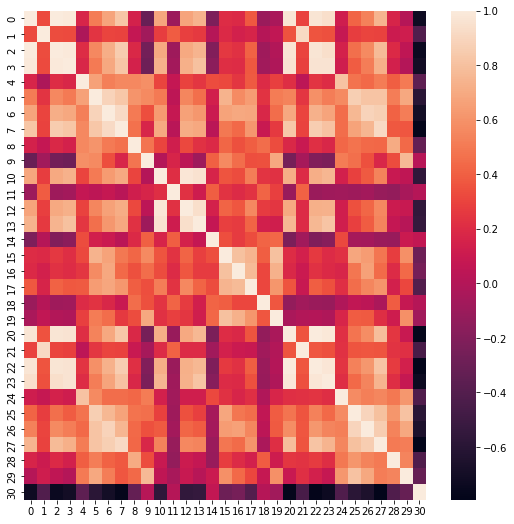

In [31]:
plt.figure(figsize=(9,9));

sns.heatmap(dataset_df.corr());

From the heatmap we can see there are many variables in the dataset that are highly correlated.

In [32]:
# Adding label column name

features_labels = np.append(features, "diagnosis")

#Adding the labels to the dataframe columns 
dataset_df.columns = features_labels

In [33]:
#Separate features and target variables
X = dataset_df.loc[:, features].values
y = dataset_df.loc[:, 'diagnosis'].values

In [34]:
X.shape

(569, 30)

**Splitting the X and Y into the Training set and Testing set**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Performing preprocessing part**

At this point we standardise the data by using StandardScalar, as PCA is influences by the data's scale of features.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Applying PCA function on training and testing set of 2 components**

We will create a pca object and find out the variance of each component from the pca.explained_variance_ratio_. This helps us compute the principal components.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

We will calculate the cumulative variance for each component which is the sum of explained bariances for all components up to a given component. 

In [16]:
cumulative_explained_variance = np.cumsum(explained_variance)
two_percent_component = np.argmax(cumulative_explained_variance>= 0.02) +1
three_percent_component = np.argmax(cumulative_explained_variance>= 0.03) +1
ninety_five_percent_component = np.argmax(cumulative_explained_variance>= 0.95) +1

We look at the components that explain 2%, 3% and 95% of the variance in the data. 

In [17]:
print("2% component:", two_percent_component)
print("3% component:", three_percent_component)
print("95% component:", ninety_five_percent_component)

2% component: 1
3% component: 1
95% component: 1


In [18]:
#For the best 2 components that contain most information, we take the first 2 elements for the explained variance ratio
best_2_components = explained_variance[:2]
#For the best 3 components that contain most information, we take the first 3 elements for the explained variance ratio
best_3_components = explained_variance[:3]

In [19]:
#For the best 95% components that contain most information, we the sum of the explained variance ratio until it reaches up to 95%
cumulative_sum = 0
for i, component in enumerate(explained_variance):
    cumulative_sum += component
    if cumulative_sum >= 0.95:
        break
best_95_components = explained_variance[:i+1]

In [20]:
best_2_components

array([0.43430767, 0.19740115])

In [21]:
best_3_components

array([0.43430767, 0.19740115])

In [22]:
best_95_components

array([0.43430767, 0.19740115])

We can observe that aross the 2,3 and 95% components, principal component 1 holds 43.43% of data and principal component 2 holds only 19.7% of information. 

**Fitting Logistic Regression To the training set**

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Predicting the test set result using predict function under LogisticRegression**

In [24]:
y_pred = classifier.predict(X_test)

**Making confusion matrix between test set of Y and predicted value**

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[44,  3],
       [ 6, 61]])

**Predicting the training set result through scatter plot**

We can visualise the set of components by using matplotlib.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


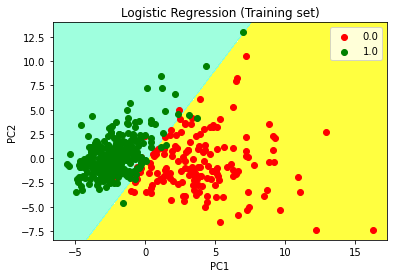

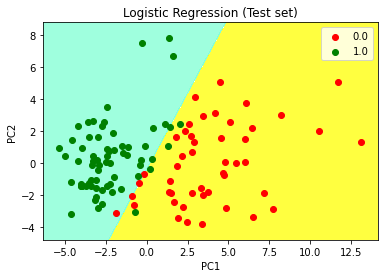

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
# show scatter plot
plt.show()


#10 Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

From the graph we can observe two classess that span the two-dimensional space. Benign class is more spread out compared to the Malignant class.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[44  3]
 [ 6 61]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        47
         1.0       0.95      0.91      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



The accuracy rate is 92% with logistic regression. With PCA we can reduce the number of dimensions in the data.

## Testing Three Components

**Normalizing and applying PCA function on training and testing set of 3 components**

In [28]:
X, y = datasets.load_breast_cancer(return_X_y = True)

sc = StandardScaler()
X_normalized = sc.fit_transform(X)

pca3 = PCA(n_components = 3).fit(X_normalized)
x_pca = pca3.transform(X_normalized)

In [29]:
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= dataset_df['diagnosis'].apply(diag)

**Predicting the training set result through scatter plot**

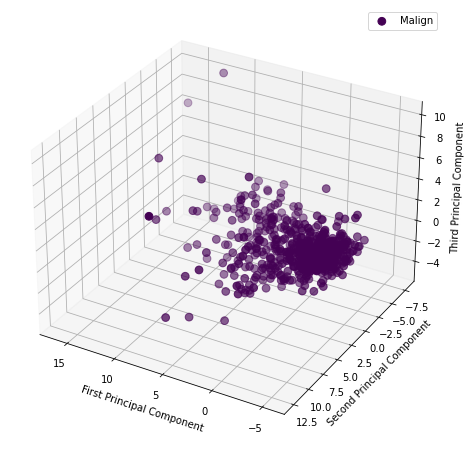

In [30]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

## Testing 95% components

**Normalizing and applying PCA function on training and testing set of 95% components**

In [31]:
X, y = datasets.load_breast_cancer(return_X_y = True)

sc = StandardScaler()
X_normalized = sc.fit_transform(X)

pcas = PCA(n_components = 0.95).fit(X_normalized)
xs_pca = pcas.transform(X_normalized)

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Third Principal Component')

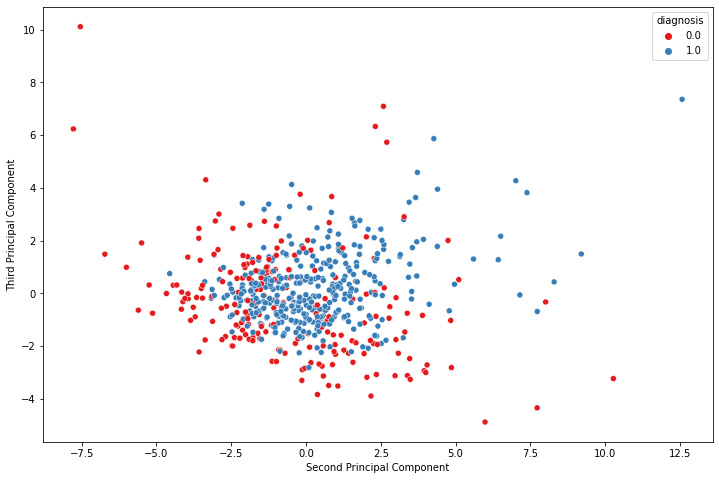

In [32]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(xs_pca[:,1], xs_pca[:,2],hue=dataset_df['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

/Users/simranbains/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

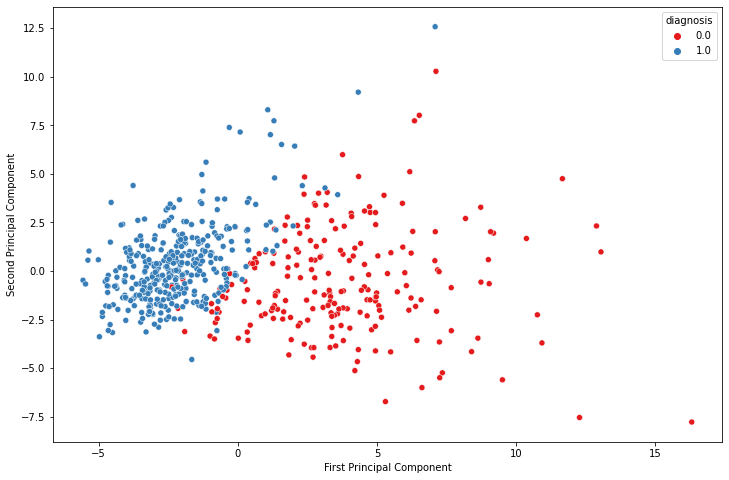

In [33]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(xs_pca[:,0], xs_pca[:,1],hue=dataset_df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

We will create a new dataframe from the components and save this as a csv file.

In [34]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

In [35]:
pca_df

,PC1,PC2,0
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


In [36]:
pca_df.to_csv('PCA.csv')